<a href="https://colab.research.google.com/github/Pratik007Chaudhari/Pratik007Chaudhari/blob/main/All_State_Insurance_Claims_Severity_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**All State insurance claim Prediction**

Topics Covered:



1.   Business Problem 
2.   Dataset Overview
3.   EDA
4.   Data Cleaning and Preprocessing
5.   Outlier treatment
6.   Feature Selection technique
7.   Machine Learning Models
8.   Hyper Parameter Tuning
9.   Model Validation
10.  Deployement Using Flask API

In [ ]:
# Import the packages 

import pandas as pd
import numpy as np
import re   # Regular Expression
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import seaborn as sns
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2
import math
import pickle


#modifing display operation to view entire Dataset

pd.options.display.max_columns = None

In [ ]:
train_data = pd.read_csv("/content/drive/MyDrive/Project Datasets/Ensemble ML Project--All State insurance Claims Severity/train.csv")

**Handling the Data**

* Analyze the training data
* Verify few observations
* Check the column headers



In [ ]:
# Knowing about Data


def know_about_dataset(dataset):
  print('\n**********************--------------------****************************\n')
  print('Shape : ', dataset.shape)
  print('\n**********************--------------------****************************\n')
  column_names =  np.array(dataset.columns)
  print('Column_names : ',column_names)
  print('\n**********************--------------------****************************\n')
  print(dataset.dtypes)
  print('\n**********************--------------------****************************\n')
  print(dataset.head())

In [ ]:
know_about_dataset(train_data)


**********************--------------------****************************

Shape :  (188318, 132)

**********************--------------------****************************

Column_names :  ['id' 'cat1' 'cat2' 'cat3' 'cat4' 'cat5' 'cat6' 'cat7' 'cat8' 'cat9'
 'cat10' 'cat11' 'cat12' 'cat13' 'cat14' 'cat15' 'cat16' 'cat17' 'cat18'
 'cat19' 'cat20' 'cat21' 'cat22' 'cat23' 'cat24' 'cat25' 'cat26' 'cat27'
 'cat28' 'cat29' 'cat30' 'cat31' 'cat32' 'cat33' 'cat34' 'cat35' 'cat36'
 'cat37' 'cat38' 'cat39' 'cat40' 'cat41' 'cat42' 'cat43' 'cat44' 'cat45'
 'cat46' 'cat47' 'cat48' 'cat49' 'cat50' 'cat51' 'cat52' 'cat53' 'cat54'
 'cat55' 'cat56' 'cat57' 'cat58' 'cat59' 'cat60' 'cat61' 'cat62' 'cat63'
 'cat64' 'cat65' 'cat66' 'cat67' 'cat68' 'cat69' 'cat70' 'cat71' 'cat72'
 'cat73' 'cat74' 'cat75' 'cat76' 'cat77' 'cat78' 'cat79' 'cat80' 'cat81'
 'cat82' 'cat83' 'cat84' 'cat85' 'cat86' 'cat87' 'cat88' 'cat89' 'cat90'
 'cat91' 'cat92' 'cat93' 'cat94' 'cat95' 'cat96' 'cat97' 'cat98' 'cat99'
 'cat100' 'cat10

**identify the categorical and numerical columns to check the data distribuition**

In [ ]:
column_datatypes = train_data.dtypes
categorical_col = list(column_datatypes[column_datatypes == 'object'].index.values)
continuous_col = list(column_datatypes[column_datatypes == 'float64'].index.values)
continuous_col.remove('loss')

**Checking the distribuition of categorical data**

In [ ]:
## Function to check the distribuition of values in categorical columns 

def category_distribuition(dataset, cat_cols):
  cat_col_dist = list()
  for cat_col in cat_cols:
    cat_col_dist.append(dataset[cat_col].value_counts())
  return cat_col_dist

In [ ]:
cat_col_dist = category_distribuition(train_data, categorical_col)

In [ ]:
#length of categorical column

length_cat_col = list(map(lambda x : len(x), cat_col_dist))

In [ ]:
# count the number of column having same number of unique values

distribuition_dict = dict()
for val in length_cat_col:
  if val in distribuition_dict.keys():
    count = distribuition_dict[val]
    distribuition_dict[val] = count + 1
  else:
    distribuition_dict[val] = 1

In [ ]:
distribuition_dict

{2: 72,
 3: 4,
 4: 12,
 8: 3,
 7: 4,
 5: 3,
 16: 2,
 15: 1,
 19: 2,
 9: 1,
 13: 1,
 17: 2,
 20: 2,
 11: 1,
 84: 1,
 131: 1,
 51: 1,
 61: 1,
 23: 1,
 326: 1}

**Plot bar Graph**

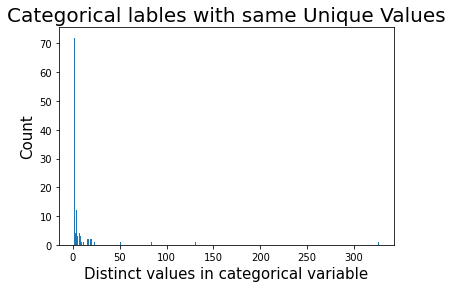

In [ ]:
#plot showing the count of columns having same number of unique values

keys = distribuition_dict.keys()
values = distribuition_dict.values()

plt.bar(keys, values, width= 0.8)
plt.xlabel("Distinct values in categorical variable", fontsize = 15)
plt.ylabel("Count", fontsize = 15)
plt.title('Categorical lables with same Unique Values', fontsize = 20)
plt.rcParams['figure.figsize'] = [48/2.54, 10/2.54]
plt.show()

**Check the distribuition for continuous columns**

In [ ]:
# filter out the continous cols and view the discriptive statistics

train_data[continuous_col].describe()

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
count,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000
mean,0.493861,0.507188,0.498918,0.491812,0.487428,0.490945,0.484970,0.486437,0.485506,0.498066,0.493511,0.493150,0.493138,0.495717
std,0.187640,0.207202,0.202105,0.211292,0.209027,0.205273,0.178450,0.199370,0.181660,0.185877,0.209737,0.209427,0.212777,0.222488
min,0.000016,0.001149,0.002634,0.176921,0.281143,0.012683,0.069503,0.236880,0.000080,0.000000,0.035321,0.036232,0.000228,0.179722
25%,0.346090,0.358319,0.336963,0.327354,0.281143,0.336105,0.350175,0.312800,0.358970,0.364580,0.310961,0.311661,0.315758,0.294610
50%,0.475784,0.555782,0.527991,0.452887,0.422268,0.440945,0.438285,0.441060,0.441450,0.461190,0.457203,0.462286,0.363547,0.407403
75%,0.623912,0.681761,0.634224,0.652072,0.643315,0.655021,0.591045,0.623580,0.566820,0.614590,0.678924,0.675759,0.689974,0.724623
max,0.984975,0.862654,0.944251,0.954297,0.983674,0.997162,1.000000,0.980200,0.995400,0.994980,0.998742,0.998484,0.988494,0.844848


**Data Cleaning and Preprocessing**

In [ ]:
#check if there is any missing values in the columns 

missing_values = train_data.isnull().sum()
np.max(missing_values)

0

Created a Class if Required processing of Missing values or Outliers


In [ ]:
class Data_preprocessing:
  def __init__(self, dataset):
    self.dataset = dataset
  
  def missing_value_continous(self, column_name_with_same_type, imputation_type):
    if imputation_type == "mean":
      mean_imputer = SimpleImputer(missing_values = np.nan, strategy = "mean")
      mean_imputer.fit(self.dataset[column_name_with_same_type])
      self.datset[column_name_with_same_type] = mean_imputer.trasform(self.dataset[column_name_with_same_type])

    if imputation_type == "median":
      median_imputer = SimpleImputer(missing_values = np.nan, strategy = "median")
      median_imputer.fit(self.dataset[column_name_with_same_type])
      self.datset[column_name_with_same_type] = median_imputer.trasform(self.dataset[column_name_with_same_type])

    return  self.dataset

  def missing_value_categorical(self, column_name_with_same_type, imputation_type):
    most_frequent = SimpleImputer(strategy = "most_frequent")
    most_frequent.fit(self.dataset[column_name_with_same_type])
    self.datset[column_name_with_same_type] = most_frequent.trasform(self.dataset[column_name_with_same_type])
    return self.dataset

  def outliers_treatment(self, Q1, Q2, IQR, columns_with_outliers, action):
    if action == "median":
      for i in range(len(columns_with_outliers)):
        column_name = columns_with_outliers[i]
        median_outlier = np.median(self.dataset[column_name])
        self.dataset.loc[self.dataset[((self.dataset[column_name] < (Q1[column_name] - (1.5 * IQR[column_name]))) | (self.dataset[column_name] > (Q3[column_name] + ( 1.5* IQR[column_name]))))].index, column_name] = median_outlier
    
    if action == "mean" :
      for i in range(len(columns_with_outliers)):
        column_name = columns_with_outliers[i]
        mean_outlier = np.mean(self.dataset[column_name])
        self.dataset.loc[self.dataset[((self.dataset[column_name] < (Q1[column_name] - ( 1.5 * IQR[column_name] ))) | (self.dataset[column_name] > (Q3[column_name] + ( 1.5* IQR[column_name] ))) )].index, column_name] = mean_outlier

    if action == "removal" :
      for i in range(len(columns_with_outliers)):
        column_name = columns_with_outliers[i]
        self.dataset = [self.dataset[~((self.dataset[column_name] < (Q1[column_name] - ( 1.5 * IQR[column_name] ))) | (self.dataset[column_name] > (Q3[column_name] + ( 1.5* IQR[column_name]))))]]
    
    return self.dataset



Dealing with outliers ::>>> One of the common technique to identify outliers is BOX PLOT


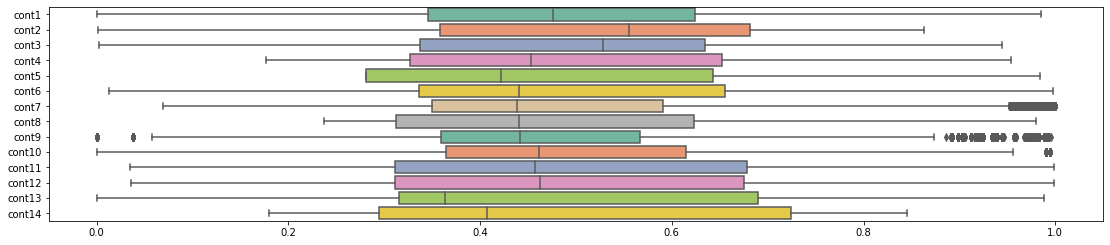

In [ ]:
ax = sns.boxplot(data = train_data[continuous_col], orient = 'h', palette = 'Set2')

In [ ]:
columns_with_outliers = ['cont7', 'cont9', 'cont10']

In [ ]:
#compute Inter Quartile Range for all the continous cols
Data_preprocessing_obj = Data_preprocessing(train_data)
Q1 = train_data[continuous_col].quantile(0.25)
Q3 = train_data[continuous_col].quantile(0.75)

IQR = (Q3 - Q1)

train_data = Data_preprocessing_obj.outliers_treatment(Q1, Q3, IQR, columns_with_outliers, "median")

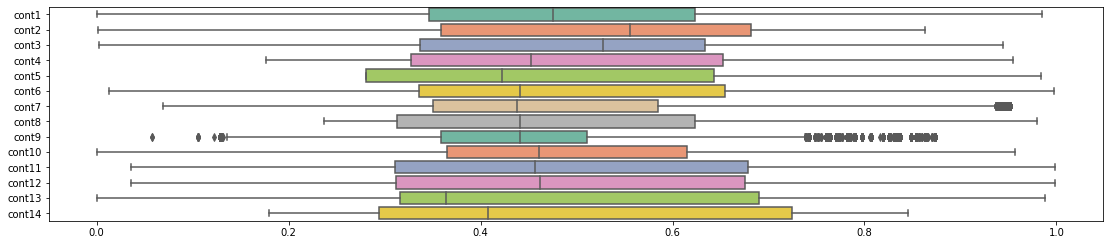

In [ ]:
ax = sns.boxplot(data = train_data[continuous_col], orient = 'h', palette = 'Set2')

Feature Selection technique for continuous and categorical features

Constant variance: Suppose we have house data and have a feature house_area,
                   but every house have near about same area. So, that feature
                   will not perform a significant role in model development.
                   Such features are having Constant Feature. 


Quasi-Constant varinace : feature will have alomost similar values over the    
data.

Above are basically a Univariate methods




In [ ]:
from IPython.utils.text import num_ini_spaces
# Function for feature selection of numeric variables
#Remove variable with constant Variance
#Remove variable with Quasi-Constant variance with a fixed threshold
#Remove correlated variables

def feature_selection_numerical_variabels(dataset, qthreshold , corr_threshold, exclude_numerical_cols_list):
  num_cols = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
  numerical_cols = list(dataset.select_dtypes( include = num_cols).columns)
  numerical_cols = [column for column in numerical_cols if column not in exclude_numerical_cols_list]

  #Remove variable with constant variable

  constant_filter = VarianceThreshold(threshold = 0)
  constant_filter.fit(dataset[numerical_cols])
  constant_columns = [column for column in dataset[numerical_cols].columns
                      if column not in dataset[numerical_cols].columns[constant_filter.get_support()]]

  if len(constant_columns) > 0:
    dataset.drop(label = constant_columns, axis = 1, inplace = True)

  #Remove deleted columns from dataset
  numerical_cols = [column for column in numerical_cols if column not in constant_columns]

  #Remove variables with qconstant variance
  #Remove quasi-costant variables
  qconstant_filter = VarianceThreshold(threshold= qthreshold)
  qconstant_filter.fit(dataset[numerical_cols])
  qconstant_cols = [column for column in dataset[numerical_cols].columns
                    if column not in dataset[numerical_cols].columns[constant_filter.get_support()]]
  if len(qconstant_cols) > 0:
    dataset.drop(labels = qconstant_cols, axis = 1, inplace = True)

  #Remove deleted columns from dataset
  numerical_cols = [column for column in numerical_cols if column not in qconstant_cols]

  #Remove correlated variables

  correlated_features = set()
  correlation_matrix = dataset[numerical_cols].corr()
  ax = sns.heatmap(correlation_matrix, vmin = -1, vmax = 1, center = 0 ,
                   cmap = sns.diverging_palette(20, 220, n = 220), square = True)
  ax.set_xticklabels( ax.get_xticklabels(), rotation = 45, horizontalalignment = 'right')
  #print(correlation_matrix)

  for i in range(len(correlation_matrix.columns)):
    for j in range(i):
      if abs(correlation_matrix.iloc[i,j]) > corr_threshold:
        colname = correlation_matrix.columns[i]
        colcompared = correlation_matrix.columns[j]
      #check if the column compared against is not in the columns exclude list

        if colcompared not in correlated_features:
          correlated_features.add(colname)
  dataset.drop(labels = correlated_features, axis = 1, inplace = True)

  return dataset, constant_columns, qconstant_cols, correlated_features



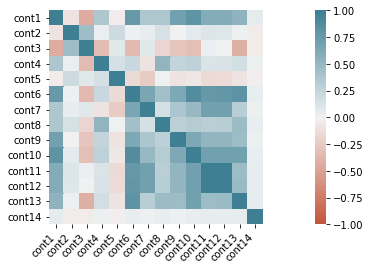

In [ ]:
train_data, constant_columns, qconstant_cols, correlated_features = feature_selection_numerical_variabels(train_data, 0.01, 0.75, ['loss','id'],)

In [ ]:
correlated_features

{'cont10', 'cont12', 'cont6'}

Handling correlation between Categorical Variables

In [ ]:
for cf1 in categorical_col:
  le = LabelEncoder()
  le.fit(train_data[cf1].unique())
  filename = cf1+".sav"
  pickle.dump(le, open(filename, 'wb'))
  train_data[cf1] = le.transform(train_data[cf1])


In [ ]:
#snippet to calculate the unique values with a categorical columns
df = pd.DataFrame(columns=["Column_Name","Count"])
for cat in categorical_col:
    unique_value_count = len(train_data[cat].unique())
    df = df.append({'Column_Name': cat, "Count":int(unique_value_count)}, ignore_index=True)
columns_unique_value = np.array(df.Count.value_counts().index)

In [ ]:
df

,Column_Name,Count
0,cat1,2
1,cat2,2
2,cat3,2
3,cat4,2
4,cat5,2
...,...,...
111,cat112,51
112,cat113,61
113,cat114,19
114,cat115,23


In [ ]:
#snippet to identify the dependent/correlated categorical variables and drop them ( chi-square test)
columns_to_drop_cat = set()
correlated_columns = dict()

for unique_value_count in columns_unique_value:
    if unique_value_count > 1:
        categorical_columns = df.loc[df.Count == unique_value_count,'Column_Name']
        categorical_columns = categorical_columns.reset_index(drop = True)
        columns_length = len(categorical_columns)

        for col in range(columns_length - 1):
            column_to_compare = categorical_columns[col]
            columns_compare_against = categorical_columns[(col+1):columns_length]
            chi_scores = chi2( train_data[columns_compare_against], train_data[column_to_compare])

            if column_to_compare not in columns_to_drop_cat:
                columns_to_be_dropped = [i for i in range(len(columns_compare_against)) if chi_scores[1][i]<=0.05]
                columns_to_drop_array = np.array(columns_compare_against)[columns_to_be_dropped]
                correlated_columns[column_to_compare]=columns_to_drop_array
                columns_to_drop_cat.update(columns_to_drop_array)

In [ ]:
columns_to_drop_cat

{'cat10',
 'cat106',
 'cat107',
 'cat11',
 'cat111',
 'cat114',
 'cat12',
 'cat13',
 'cat14',
 'cat16',
 'cat17',
 'cat18',
 'cat19',
 'cat2',
 'cat20',
 'cat21',
 'cat23',
 'cat24',
 'cat25',
 'cat26',
 'cat27',
 'cat28',
 'cat29',
 'cat3',
 'cat30',
 'cat31',
 'cat33',
 'cat34',
 'cat35',
 'cat36',
 'cat37',
 'cat38',
 'cat39',
 'cat4',
 'cat40',
 'cat41',
 'cat42',
 'cat43',
 'cat44',
 'cat45',
 'cat46',
 'cat47',
 'cat48',
 'cat49',
 'cat5',
 'cat50',
 'cat51',
 'cat52',
 'cat53',
 'cat54',
 'cat55',
 'cat56',
 'cat57',
 'cat58',
 'cat59',
 'cat6',
 'cat60',
 'cat61',
 'cat62',
 'cat63',
 'cat64',
 'cat65',
 'cat66',
 'cat67',
 'cat68',
 'cat69',
 'cat7',
 'cat70',
 'cat71',
 'cat72',
 'cat74',
 'cat76',
 'cat78',
 'cat79',
 'cat8',
 'cat80',
 'cat81',
 'cat82',
 'cat83',
 'cat84',
 'cat85',
 'cat86',
 'cat87',
 'cat9',
 'cat91',
 'cat92',
 'cat97',
 'cat98'}

In [ ]:
train_data = train_data.drop(columns_to_drop_cat, axis = 1)

In [ ]:
correlated_features = list(correlated_features)
columns_to_drop_cat = list(columns_to_drop_cat)
columns_to_drop_cat.extend(correlated_features)
column_to_drop = columns_to_drop_cat.copy()

#output of the column_to_drop file to a csv

columns_to_drop_df = pd.DataFrame(column_to_drop, columns = ['colnames'])
columns_to_drop_df.to_csv('Columns_to_drop.csv' , index = False)

Visualization of Output Variable

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


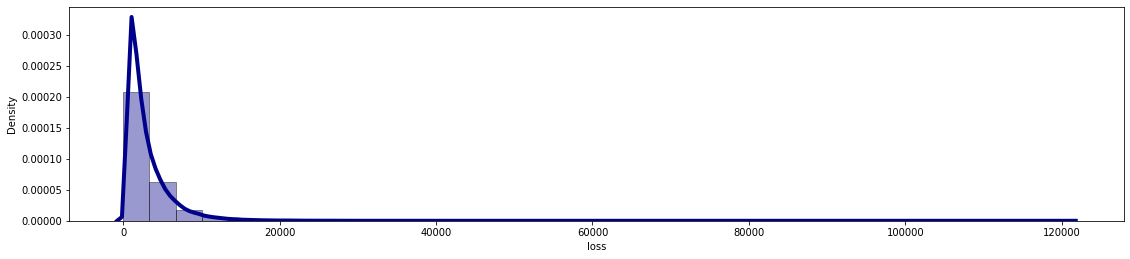

In [ ]:
#Visaliazing the distribuition of loss value
#Density plot of Histpogram of loss

sns.distplot(train_data['loss'], hist = True, kde = True, 
             bins = int(180/5), color = 'darkblue', 
             hist_kws = {'edgecolor' : 'black'},
             kde_kws = {'Linewidth' : 4})

In [ ]:
# we will use log transformation on dependant varible to reduce the scale

train_data['loss'] = np.log(train_data['loss'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


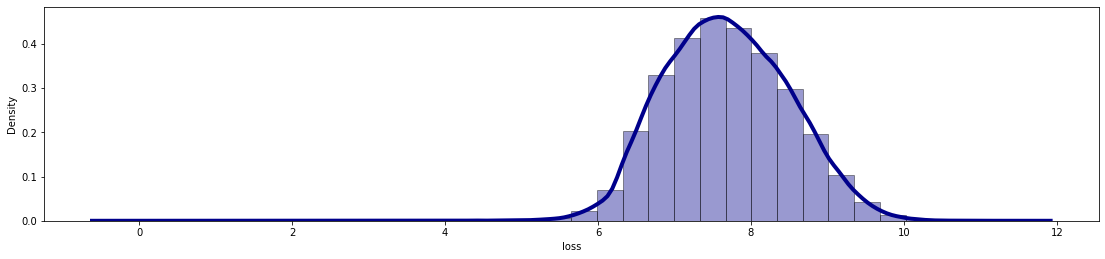

In [ ]:
#Visaliazing the distribuition of loss value
#Density plot of Histpogram of loss

sns.distplot(train_data['loss'], hist = True, kde = True, 
             bins = int(180/5), color = 'darkblue', 
             hist_kws = {'edgecolor' : 'black'},
             kde_kws = {'Linewidth' : 4})

Fit a ML Model

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
#convert the int64 columns categorical

column_datatypes = train_data.dtypes
Integer_columns = list(column_datatypes.where(lambda x: x == 'int64').dropna().index.values)
train_data[Integer_columns] = train_data[Integer_columns].astype('category' , copy = False)
x, y = train_data.drop(['id', 'loss'], axis = 1), train_data['loss']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 42)

In [ ]:
#Instantiate model with 100 decision trees

rf_base = RandomForestRegressor( n_estimators= 100, random_state = 42, oob_score= True)
rf_base.fit(x_train , y_train)

RandomForestRegressor(oob_score=True, random_state=42)

In [ ]:
# save the model output

pickle.dump(rf_base, open('basemodel_rf', 'wb'))

In [ ]:
# load the saved model and predict on test data

basemodel_rf = pickle.load(open('basemodel_rf', 'rb'))

In [ ]:
# validate the accuracy of the base model
# compare the model accuracies

y_test_predict_base = basemodel_rf.predict(x_test)
print('Base Model Accuracy : ', np.sqrt(mean_squared_error(y_test, y_test_predict_base)))

Base Model Accuracy :  0.6664665637796248


Hyper Parameter Tuning Using RandomSearcCv


In [ ]:
#number of trees
n_estimators = [100, 200, 300, 400, 500]

#number of features to be considered at every split
max_features = ['auto', 'sqrt']

#maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]

#minimum number of samples required to split a node
min_samples_split = [200, 400, 600]

#minimum number of samples required at each lead node
min_samples_leaf = [1, 2, 3]

#method of selecting samples for trainig each tree
bootstrap = [True, False]

#create a random grid

random_grid = {  'n_estimators' : n_estimators,
                 'max_features' : max_features,
                 'max_depth' : max_depth,
                 'min_samples_split' : min_samples_split,
                 'min_samples_leaf' : min_samples_leaf,
                 'bootstrap' : bootstrap }


In [ ]:
# Use the random grid to search for best hyperparameters
# base model to tune
rf = RandomForestRegressor()

# 5 fold cross validation, 
# search across 150 different combinations, and use all available cores
rf_tuned = RandomizedSearchCV( estimator = rf, param_distributions = random_grid, cv = 3, n_iter = 5, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rf_tuned.fit(x_train, y_train)

#save the model output
pickle.dump(rf_tuned, open("tunedmodel_rf", 'wb'))

Fitting 3 folds for each of 5 candidates, totalling 15 fits


In [ ]:
# check the best params

rf_tuned.best_param_

In [ ]:
# load the model and predict on test data

tunedmodel_rf = pickle.load( open('tunedmodel_rf' , 'rb'))

y_test_predict_tuned = tunedmodel_rf.predict(x_test)
print(' Tuned Model accuracy : ', np.sqrt(mean_squared_error(y_test, y_test_predict_tuned )))

Tuning a Gradient Boosting Model

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor 

gbm_base = GradientBoostingRegressor(
     max_depth = 2,
     n_estimators = 3,
     learning_rate = 1.0)

gbm_base.fit(x_train, y_train)

#save the GBM model
pickle.dump(gbm_base, open('basemodel_GBM', 'wb'))

In [ ]:
# load the saved model and predict on the test data

basemodel_GBM = pickle.load(open('basemodel_GBM', 'rb'))

y_test_predict_GBM = basemodel_GBM.predict(x_test)

print(' Base Model GBM accuracy : ', np.sqrt(mean_squared_error(y_test, y_test_predict_GBM )))